In [1]:
# install datasets
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 4.4 MB/s eta 0:00:00


In [2]:
# huggingface datatsets
from datasets import load_dataset

Trying out with MRDA: fewer labels than OASIS

In [3]:
silicone_data_train = load_dataset('silicone', 'oasis', split = 'train').to_pandas()
silicone_data_test = load_dataset('silicone', 'oasis', split = 'test').to_pandas()

Generating train split:   0%|          | 0/12076 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1513 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1478 [00:00<?, ? examples/s]

Dataset silicone downloaded and prepared to /root/.cache/huggingface/datasets/silicone/oasis/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5. Subsequent calls will reuse this data.


In [4]:
silicone_data_valid = load_dataset('silicone', 'oasis', split = 'validation').to_pandas()

In [5]:


# The one hot encoding of each 42 labels
from sklearn.preprocessing import LabelBinarizer
ohencoder=LabelBinarizer()
# Training data
trainlabels=silicone_data_train.copy()
trainlabels=trainlabels.pop('Dialogue_Act')
trainlabels=trainlabels.values

validlabels=silicone_data_valid.copy()
validlabels=validlabels.pop('Dialogue_Act')
validlabels=validlabels.values
#Train data
trainlabels=ohencoder.fit_transform(trainlabels)

# Test data
testlabels=ohencoder.transform(silicone_data_test['Dialogue_Act'].values)

# Validation data
validationlabels=ohencoder.transform(validlabels)



In [6]:
import tensorflow as tf

In [7]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 22.4 MB/s eta 0:00:00


In [8]:
!pip install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import tensorflow as tf
#Small BERT Model with less layers than the original BERT
import tensorflow_text
import tensorflow_hub as hub

Ideas:
- Test BERT Uncased 512, 256, 768 and compare training time and accuracy: https://github.com/google-research/bert/blob/master/README.md

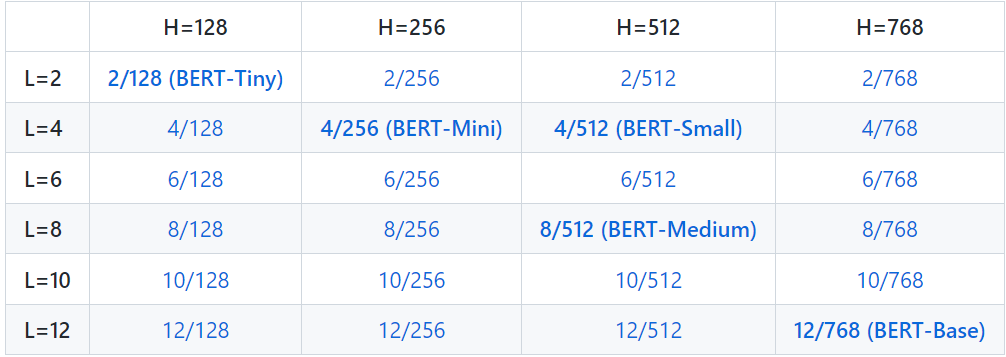


In [10]:
#bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' # BERT SMALL 
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-256_A-4' #BERT MINI
#bert_model_name = 'small_bert/bert_en_uncased_L-8_H-512_A-8' # BERT MEDIUM
#bert_model_name = 'bert_en_uncased_L-12_H-768_A-12' # BERT BASE


map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [11]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
trainfeatures= silicone_data_train.copy()
trainfeatures.drop(columns=['Speaker','Label','Dialogue_Act','Idx'],inplace=True)

trainfeatures=trainfeatures.values
#trainlabels=silicone_data_train.copy()
#trainlabels=trainlabels.pop('Dialogue_Act')
#trainlabels=trainlabels.values

#validlabels=silicone_data_valid.copy()
#validlabels=validlabels.pop('Dialogue_Act')
#validlabels=validlabels.values
validfeatures= silicone_data_valid.copy()
validfeatures.drop(columns=['Speaker','Label','Dialogue_Act','Idx'],inplace=True)
validfeatures=validfeatures.values

testfeatures= silicone_data_test.copy()
testfeatures.drop(columns=['Speaker','Label','Dialogue_Act','Idx'],inplace=True)

testfeatures=testfeatures.values
#On one example : preprocessing of the text
text_preprocessed = bert_preprocess_model(trainfeatures[0])

In [12]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)
bert_results = bert_model(text_preprocessed)
print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1
Pooled Outputs Shape:(1, 256)
Pooled Outputs Values:[-0.9690998  -0.12064031 -0.9421417  -0.52763647  0.08640769  0.99643505
 -0.10511006 -0.05567922  0.14352575  0.99712837  0.19394267  0.9999602 ]
Sequence Outputs Shape:(1, 128, 256)
Sequence Outputs Values:[[-0.37781757 -1.007221    0.48642665 ...  1.0512385  -1.3688939
   0.13448131]
 [-1.1410712  -0.24813332  0.80361766 ...  1.0574224  -1.48003
  -0.01196771]
 [-0.9063768  -0.13140287  1.1147643  ...  0.38671386 -1.6973672
   0.07575797]
 ...
 [-0.6725958  -0.19484687  0.95426524 ...  0.9698472  -1.2962114
   0.38416815]
 [-0.7321931  -0.03743588  0.49434167 ...  0.97288173 -1.5539223
   0.39433104]
 [-0.89378804  0.1805692   0.35255253 ...  1.1081498  -1.7408044
   0.36138916]]


In [13]:
#Definition of the model
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(42, activation=None, name='classifier')(net) # for OASIS
  #net = tf.keras.layers.Dense(5, activation=None, name='classifier')(net) # for MRDA
  return tf.keras.Model(text_input, net)



In [14]:


classifier_model = build_classifier_model()
classifier_model.summary()



Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [15]:


loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = tf.metrics.CategoricalAccuracy()



In [16]:


epochs=5
optimizer=tf.keras.optimizers.Adam(1e-5)
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)



In [17]:
#BERT MINI

In [18]:
#%%timeit
# Model Training  
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=trainfeatures,y=trainlabels,
                               validation_data=(validfeatures,validationlabels),
                               batch_size=32,
                               epochs=epochs)



Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1
Epoch 1/5
378/378 [==============================] - 1117s 3s/step - loss: 2.6930 - categorical_accuracy: 0.3653 - val_loss: 1.9280 - val_categorical_accuracy: 0.5215
Epoch 2/5
378/378 [==============================] - 1090s 3s/step - loss: 1.8524 - categorical_accuracy: 0.5411 - val_loss: 1.5598 - val_categorical_accuracy: 0.5796
Epoch 3/5
378/378 [==============================] - 1091s 3s/step - loss: 1.5732 - categorical_accuracy: 0.5931 - val_loss: 1.4019 - val_categorical_accuracy: 0.6272
Epoch 4/5
378/378 [==============================] - 1088s 3s/step - loss: 1.4399 - categorical_accuracy: 0.6163 - val_loss: 1.3095 - val_categorical_accuracy: 0.6305
Epoch 5/5
378/378 [==============================] - 1091s 3s/step - loss: 1.3413 - categorical_accuracy: 0.6357 - val_loss: 1.2422 - val_categorical_accuracy: 0.6477


In [19]:
#%%timeit



#Evaluate on test set
loss, accuracy = classifier_model.evaluate(testfeatures,testlabels)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')



47/47 [==============================] - 37s 792ms/step - loss: 1.2917 - categorical_accuracy: 0.6482
Loss: 1.291668176651001
Accuracy: 0.6481732130050659


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

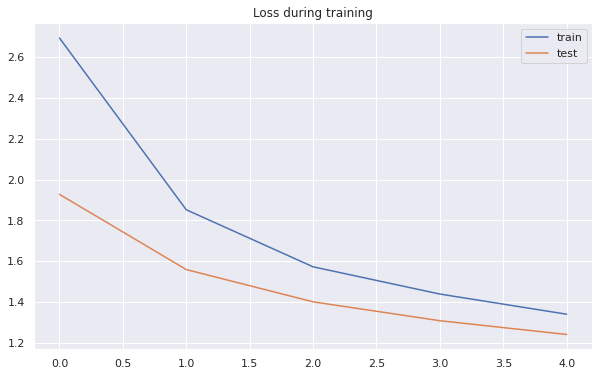

In [25]:
sns.set()

#PLot of loss during training
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(['train', 'test'])
plt.title('Loss during training')
plt.show();



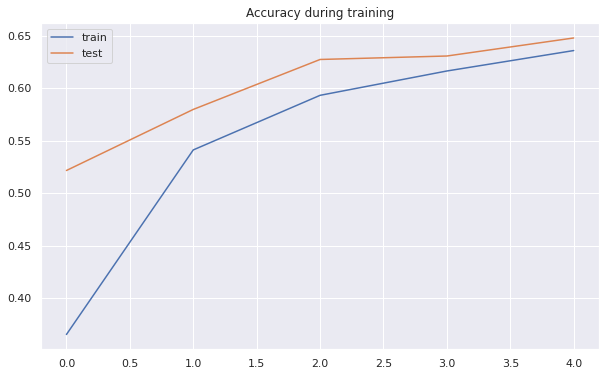

In [26]:


#Plot the accuracy during training
plt.figure(figsize = (10, 6))
plt.plot(history.history['categorical_accuracy'], label = 'train')
plt.plot(history.history['val_categorical_accuracy'], label = 'test')
plt.legend(['train', 'test'])
plt.title('Accuracy during training')
plt.show();



In [23]:
import seaborn as sns

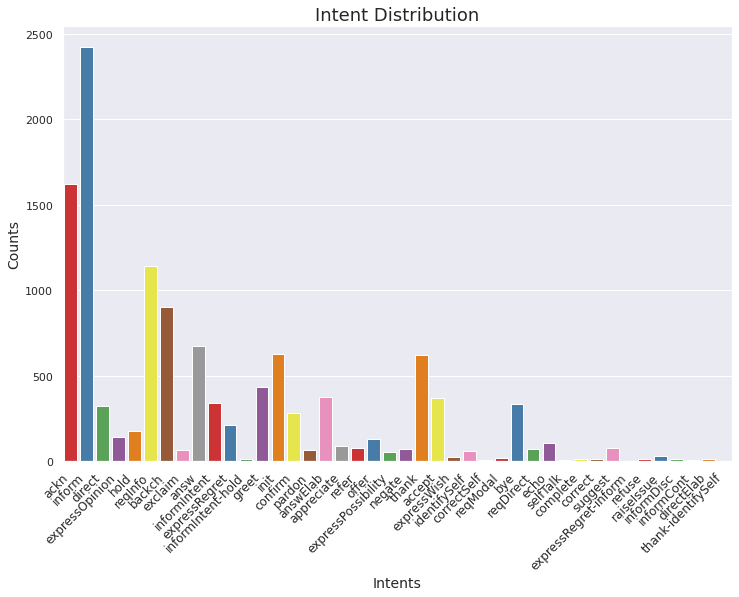

In [24]:
sns.set()
plt.figure(figsize = (12, 8))
chart = sns.countplot(x = 'Dialogue_Act', data = silicone_data_train, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment='right', fontweight='light', fontsize='medium')
chart.set_title('Intent Distribution', fontsize = 18)
chart.set_xlabel('Intents', fontsize = 14)
chart.set_ylabel('Counts', fontsize = 14)
plt.show()